In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import rlway.osrd.infra as infr

In [90]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [91]:
from rlway.schedules import Schedule, schedule_from_simulation

In [92]:
s = schedule_from_simulation(infra, res, simplify_route_names=False)
# s.draw_graph()

['rt.DA1->DA_out', 'rt.buffer_stop.0->DA1', 'rt.DA2->DA_out', 'rt.buffer_stop.1->DA2', 'rt.DA_out->DB_in', 'rt.DB_in->DB2', 'rt.DB_in->DB1', 'rt.DB1->buffer_stop.2', 'rt.DB2->buffer_stop.3']


In [93]:
routes_switches = {
    route['id']: list(route['switches_directions'].keys())[0]
    for route in infra['routes']
    if len(list(route['switches_directions'].keys())) != 0
}
routes_switches

{'rt.DA1->DA_out': 'CVG',
 'rt.DA2->DA_out': 'CVG',
 'rt.DB_in->DB2': 'DVG',
 'rt.DB_in->DB1': 'DVG',
 'rt.buffer_stop.2->buffer_stop.1': 'DVG',
 'rt.buffer_stop.2->buffer_stop.0': 'DVG',
 'rt.buffer_stop.3->buffer_stop.1': 'DVG',
 'rt.buffer_stop.3->buffer_stop.0': 'DVG'}

In [94]:
s

                             0                 1         
                             s        e        s        e
CVG                     24.993   54.183   24.993   54.183
rt.buffer_stop.0->DA1      0.0   50.829      NaN      NaN
rt.buffer_stop.1->DA2      NaN      NaN      0.0   50.829
rt.DA_out->DB_in        31.034  328.595   31.034  328.595
DVG                    289.464  328.595  289.464  328.595
rt.DB1->buffer_stop.2  293.105  328.595      NaN      NaN
rt.DB2->buffer_stop.3      NaN      NaN  293.105  328.595

In [95]:
infr.draw_infra(infra)

In [99]:
infr.draw_infra(infra, remove_bufferstop_to_bufferstop=False)

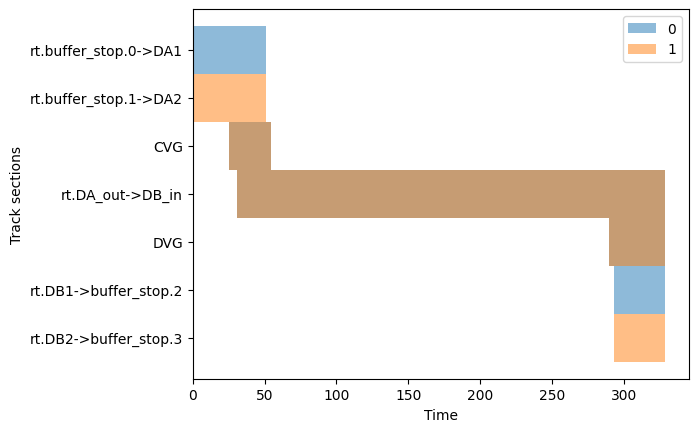

In [98]:
s.sort().plot()